# Heat Partial Differential Equation
$$
\frac{\partial{u}}{\partial{t}} = k\frac{\partial^2{u}}{\partial{x^2}}\qquad
$$

Among the partial derivatives the heat equation is oe of the more simple differential equations.  
It is used to simulate the evolution of heat in an object as time passes.  
The partial derivative of function u with respect to time is equal to,  
second partial derivative of function u but this time with respect to x,  
the position on the x-axis on the object(that can be 1d, 2d, ...).  
K is constant assuming the object is a metal rod.

Although solving partial differential equations is quite hard it can be done with heat partial derivative,
and it will be demonstrated in the code below.

Some of the plots do ilustrate the evolution of the process and therefore most be executed to show the result.
I have not used multithreading to be able to run animations and go on with the code.

## 1D Heat Equation

$$
\frac{\partial{u}}{\partial{t}} = k\frac{\partial^2{u}}{\partial{x^2}}\qquad
$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy as cp
from matplotlib import colors
from IPython.display import display, clear_output
from mpl_toolkits.mplot3d import Axes3D

In [3]:
length = 10               # length of rod
k = .466                  # heat constant of steel
total_time = 15           # time sim will run for

In [4]:
dx = .1    # space in between points, the smaller the better
x_vec = np.linspace(0, length, int(length/dx))    

dt = .01    # space in between steps in time
t_vec = np.linspace(0, total_time, int(total_time/dt))

# defines an empty 2D numpy array to store the values of u(t, x) as   # we solve for them
u = np.zeros([len(t_vec), len(x_vec)])

u[:] = np.sin(np.arange(len(u[0]))/16)

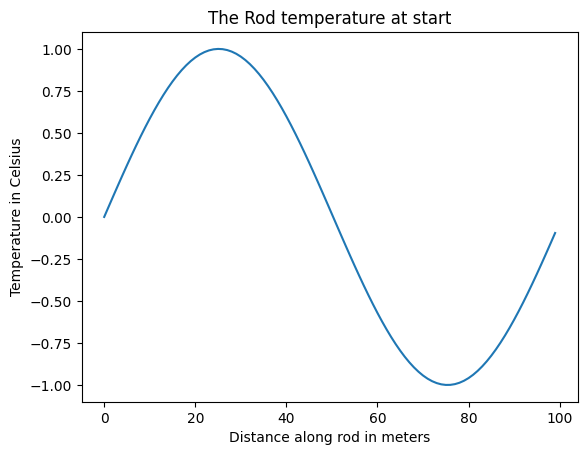

In [5]:
plt.plot(u[0])
plt.title('The Rod temperature at start')
plt.xlabel('Distance along rod in meters')
plt.ylabel('Temperature in Celsius')
plt.show()

### Plotting the temperature evolution

Below we can see animated plot of heat, we are missing the third axis being time.  
This axis is the animation itself, showing the evolution of the heat in the rod as time passes.

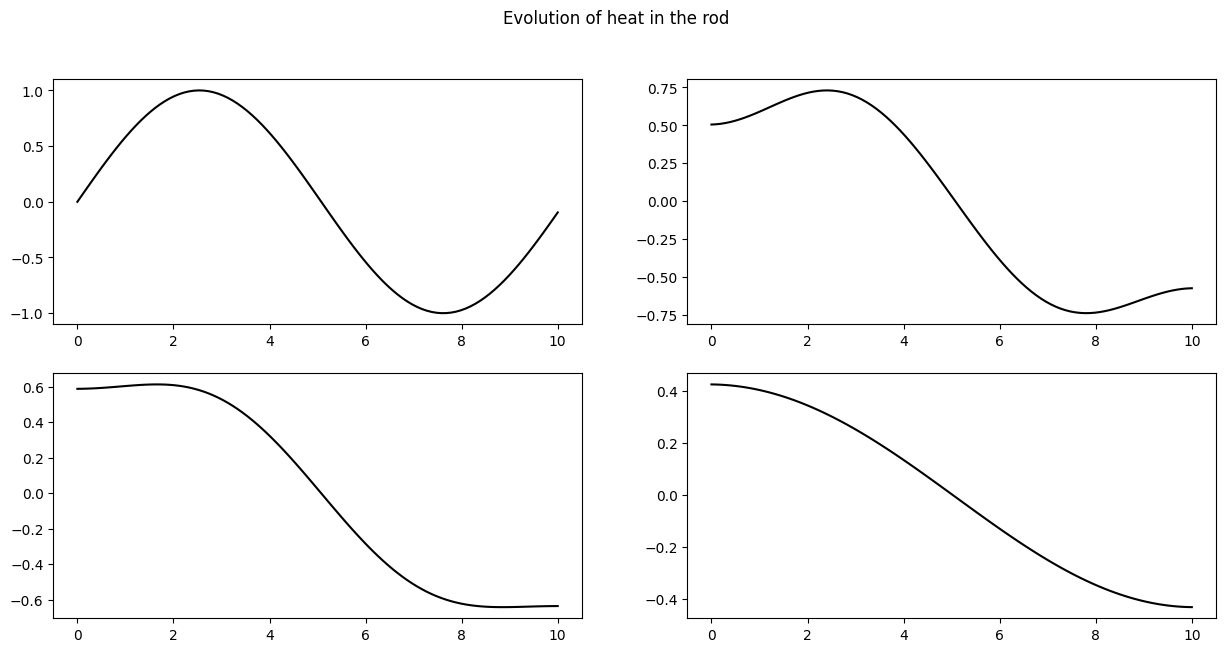

In [6]:
for t in range(1, len(u)-1):
    for x in range(0, len(u[t])):
        # the first conditions simulate the rod as if it had perfectly insulated ends,
        # not constant temperature at ends
        if x == 0:
            u[t+1, x] = k * (dt / dx**2) * (u[t, x+1] - 2*u[t, x] + u[t, x]) + u[t, x]
        elif x == len(u[t])-1:
            u[t+1, x] = k * (dt / dx**2) * (u[t, x] - 2*u[t, x] + u[t, x-1]) + u[t, x]
        else:
            u[t+1, x] = k * (dt / dx**2) * (u[t, x+1] - 2*u[t, x] + u[t, x-1]) + u[t, x]
        
fig, ax = plt.subplots()

line, = ax.plot(x_vec, u[0], 'black')
ax.legend(['Temperature'])
ax.set_title('Heat at: {} time steps'.format(0))

for i in range(1, len(u), 20):
    clear_output(wait=True)
    line.set_data(x_vec, u[i])
    ax.set_title('Heat at: {} time steps'.format(i))
    display(fig)

# Clear the animation figures so that final plot can be plotted nicely
clear_output(wait=True)
plt.clf()

# Whe animation ends I wanna display the figure as a few sub-figures
# demonstrating the evolution with no need to re-run the code
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Evolution of heat in the rod')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(x_vec, u[0], 'black')
ax2.plot(x_vec, u[len(u)//8], 'black')
ax3.plot(x_vec, u[len(u)//4], 'black')
ax4.plot(x_vec, u[-1], 'black')
plt.show()

### Evolution of heat as a surface

This plot is not dynamic but adds the time axis to the last plot therefore showing the evolution of the heat in the meta rod.

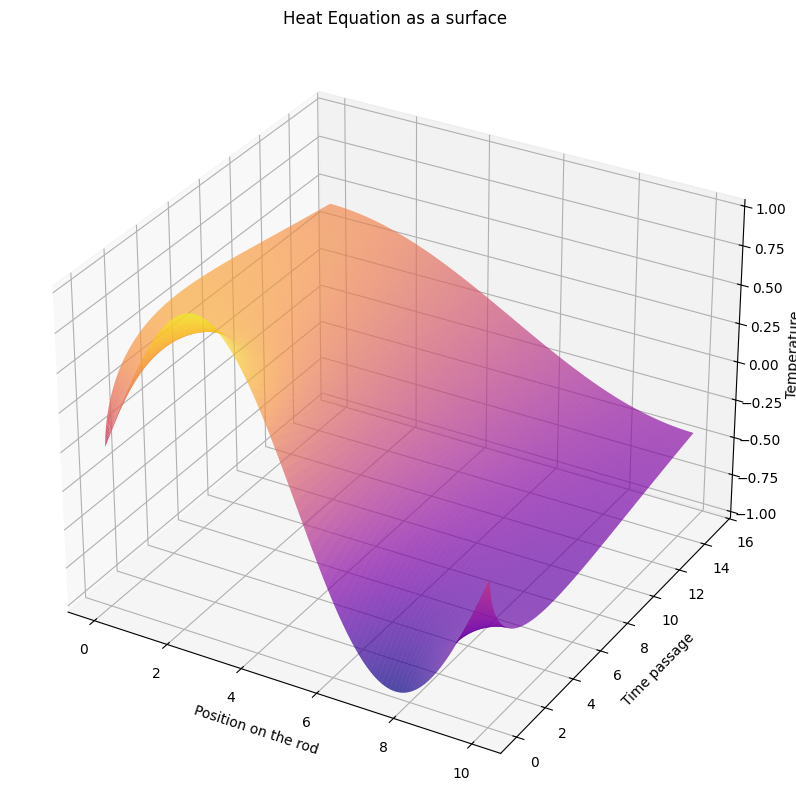

In [7]:
X = x_vec
Y = t_vec
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10)) 
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
ax.set_title('Heat Equation as a surface')
ax.set_xlabel('Position on the rod')
ax.set_ylabel('Time passage')
ax.set_zlabel('Temperature')

plt.show()

### Evolution of heat in a rod

Below is a dynamic plot showing the heat evolution once again in different frmat you might be familir with.
This format looks more like thermal camera and is therefore nice to show how heat is distributed across time.

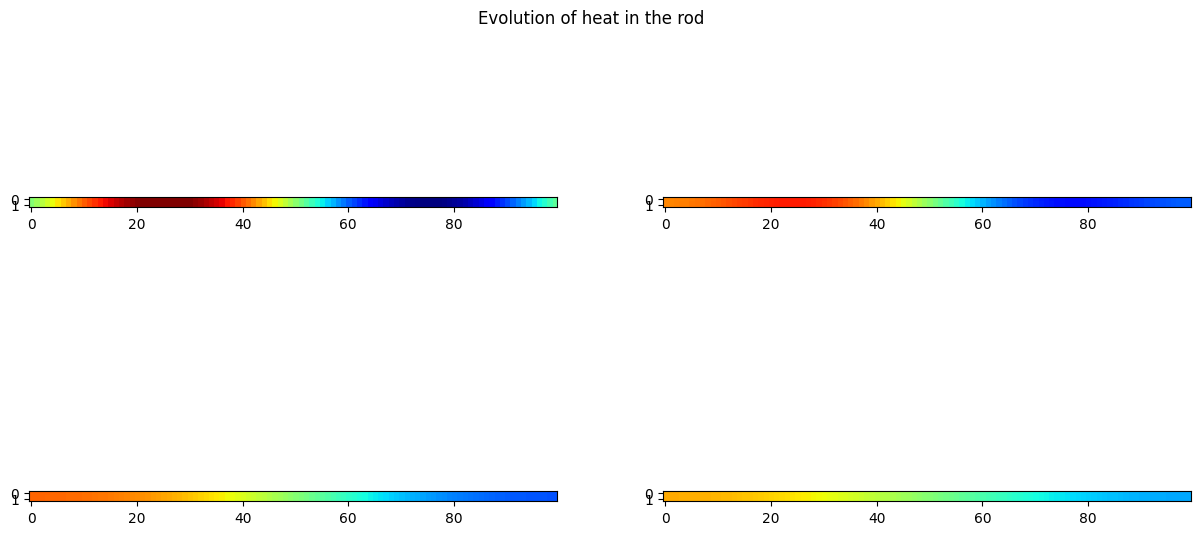

In [8]:
bounds=np.arange(np.min(u), np.max(u), (np.max(u) - np.min(u))/50)

for i in range(2, len(u), (len(u)-2)//100):
    clear_output(wait=True)
    plt.figure(figsize=(15,6))
    img = plt.imshow(u[i-2:i], cmap=plt.cm.jet, vmin=bounds[0], vmax=bounds[-1])
    plt.colorbar(img, cmap=plt.cm.jet, boundaries=bounds, ticks=bounds)
    plt.title('Heat at: {} time steps'.format(i))
    plt.show()

# Clear the animation figures so that final plot can be plotted nicely
clear_output(wait=True)
plt.clf()

# Whe animation ends I wanna display the figure as a few sub-figures
# demonstrating the evolution with no need to re-run the code
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Evolution of heat in the rod')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(u[0:2], cmap=plt.cm.jet, vmin=bounds[0], vmax=bounds[-1])
ax2.imshow(u[len(u)//8:len(u)//8+2], cmap=plt.cm.jet, vmin=bounds[0], vmax=bounds[-1])
ax3.imshow(u[len(u)//2:len(u)//2+2], cmap=plt.cm.jet, vmin=bounds[0], vmax=bounds[-1])
ax4.imshow(u[-2:], cmap=plt.cm.jet, vmin=bounds[0], vmax=bounds[-1])
plt.show()

## 2D Heat Equation

...

In [9]:
a = 110
length = 50 #mm
tme = 1 #seconds
nodes = 40

dx = length / nodes
dy = length / nodes

dt = min( dx**2 / (4 * a), dy**2 / (4 * a))

t_nodes = int(tme/dt)

u = np.zeros((nodes, nodes)) + 20 # Plate is initially as 20 degres C

In [10]:
# Boundary Conditions 
u[0:5, :] = 0
u[-5:, :] = 0

u[:, 0:5] = 0
u[:, -5:] = 0
evol = [cp.deepcopy(u)]

In [11]:
counter = 0

while counter < tme :
    
    w = u.copy()

    for i in range(0, nodes):
        for j in range(0, nodes):

            if i == 0:
                dd_ux = (w[i, j] - 2*w[i, j] + w[i+1, j])/dx**2
            elif i == nodes-1:
                dd_ux = (w[i-1, j] - 2*w[i, j] + w[i, j])/dx**2
            else:
                dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j])/dx**2
            
            if j == 0:
                dd_uy = (w[i, j] - 2*w[i, j] + w[i, j+1])/dy**2
            elif j == nodes-1:
                dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j])/dy**2
            else:
                dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1])/dy**2
                

            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]

    counter += dt
    evol.append(cp.deepcopy(u))

### 2D Heatmap

Below is a dynamic plot showing the evolution of heat in the object,  
this is very similar as the last plot using thermal vision like colors,  
therefore is easy to visualize the change in the heat.

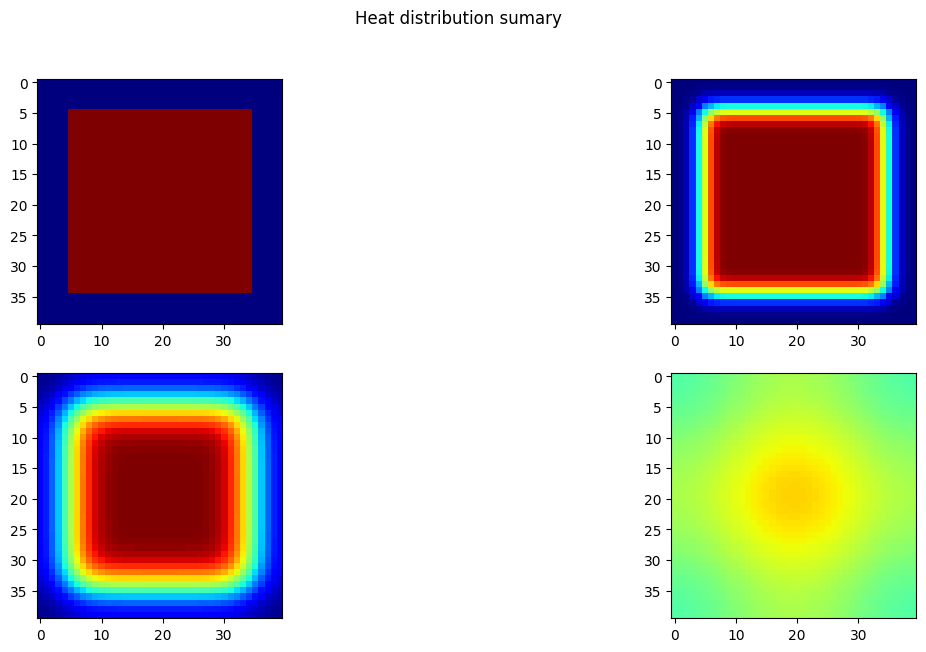

In [12]:
counter = 0
for u_arr in evol:
    clear_output(wait=True)
    pcm = plt.imshow(u_arr, cmap=plt.cm.jet, vmin=np.min(evol), vmax=np.max(evol))
    plt.colorbar(pcm)
    plt.title("Distribution at t: {:.3f} [s].".format(counter))
    plt.show()
    counter += dt
    
# Clear the animation figures so that final plot can be plotted nicely
clear_output(wait=True)
plt.clf()

# Whe animation ends I wanna display the figure as a few sub-figures
# demonstrating the evolution with no need to re-run the code    
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Heat distribution sumary')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(evol[0], cmap=plt.cm.jet, vmin=np.min(evol), vmax=np.max(evol))
ax2.imshow(evol[len(u)//8], cmap=plt.cm.jet, vmin=np.min(evol), vmax=np.max(evol))
ax3.imshow(evol[len(u)//2], cmap=plt.cm.jet, vmin=np.min(evol), vmax=np.max(evol))
ax4.imshow(evol[-1], cmap=plt.cm.jet, vmin=np.min(evol), vmax=np.max(evol))
plt.show()

### Heat as a surface

Below is a dynamic plot showing heat evolution as a surface  
x axis and y axis are both showing the position on the metal platform.  
Z axis shows the temperature as a surface.

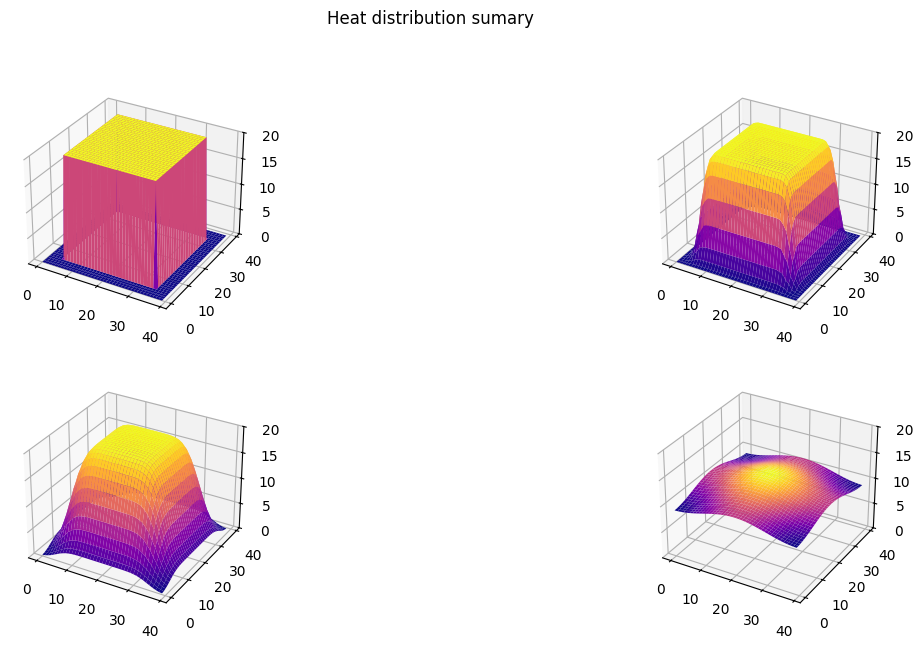

In [13]:
X = np.arange(nodes)
Y = np.arange(nodes)
X, Y = np.meshgrid(X, Y)

counter = 0
speed = 2
for i in range(0, len(evol), speed):
    clear_output(wait=True)
    u_arr = evol[i]
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10)) 
    surf = ax.plot_surface(X, Y, u_arr, rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
    ax.set_title('Heat displayed as a surface at t: {:.3f} [s].'.format(counter))
    ax.set_xlabel('Position X')
    ax.set_ylabel('Position Y')
    ax.set_zlabel('Temperature')
    ax.set_zlim(np.min(evol), np.max(evol))
    plt.show()
    counter += dt*speed
    
# Clear the animation figures so that final plot can be plotted nicely
clear_output(wait=True)
plt.clf()

# Whe animation ends I wanna display the figure as a few sub-figures
# demonstrating the evolution with no need to re-run the code    
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Heat distribution sumary')
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
ax1.plot_surface(X, Y, evol[0], rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
ax2.plot_surface(X, Y, evol[len(u)//8], rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
ax3.plot_surface(X, Y, evol[len(u)//2], rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
ax4.plot_surface(X, Y, evol[-1], rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), shade='interp')
ax1.set_zlim(np.min(evol), np.max(evol))
ax2.set_zlim(np.min(evol), np.max(evol))
ax3.set_zlim(np.min(evol), np.max(evol))
ax4.set_zlim(np.min(evol), np.max(evol))
plt.show()